# import

In [42]:
import datetime, math
import pandas as pd, numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy_ext import rolling_apply as rolling_apply_ext
import talib
from talib import MA_Type

In [2]:
df = pd.read_csv('market_data_binance.by_minute_ALL_2022-09-19T04:00:00Z_2022-09-26T03:59:00Z.csv')
df['time'] = pd.to_datetime(df['timestamp'], unit='s')
df_close = df.pivot(index='time', columns='symbol', values='close')

In [3]:
def get_close_between_datetime(sample_period_minutes, symbols, start_datetime_str, end_datetime_str):   
    return df_close[(df_close.index >= start_datetime_str) & (df_close.index < end_datetime_str)][symbols].resample(f'{sample_period_minutes}min').last()

def get_close_between_date(sample_period_minutes, symbols, start_date_str, end_date_str):   
    return get_close_between_datetime(sample_period_minutes, symbols, start_date_str + " 00:00:000", end_date_str + " 00:00:000")

In [7]:
date_str_20220919 = "2022-09-19"
date_str_20220920 = "2022-09-20"
date_str_20220921 = "2022-09-21"
date_str_20220922 = "2022-09-22"
date_str_20220923 = "2022-09-23"
date_str_20220924 = "2022-09-24"
date_str_20220925 = "2022-09-25"
#symbols = ['YFIIUSDT', 'ETHUSDT', 'PAXGUSDT', 'BIFIUSDT', 'BNBUSDT']
symbols = ['YFIIUSDT', 'ETHUSDT', 'BIFIUSDT']

In [18]:
df_prices = get_close_between_date(1, symbols, date_str_20220919, date_str_20220922)
wgt = [-0.01691221,-0.06233537, 0.5031666]
df_prices_weighted = df_prices * wgt
values = df_prices_weighted.sum(axis=1).to_frame().rename(columns={0: 'value'})

# BBands

In [19]:
values

,value
time,
2022-09-19 04:00:00,75.855979
2022-09-19 04:01:00,75.924007
2022-09-19 04:02:00,75.995252
2022-09-19 04:03:00,75.844676
2022-09-19 04:04:00,75.666581
...,...
2022-09-21 23:55:00,76.843955
2022-09-21 23:56:00,76.771932
2022-09-21 23:57:00,76.940232


In [39]:
upper, middle, lower = talib.BBANDS(values.value, 80, 2.0, matype=MA_Type.T3)

<Axes: xlabel='time'>

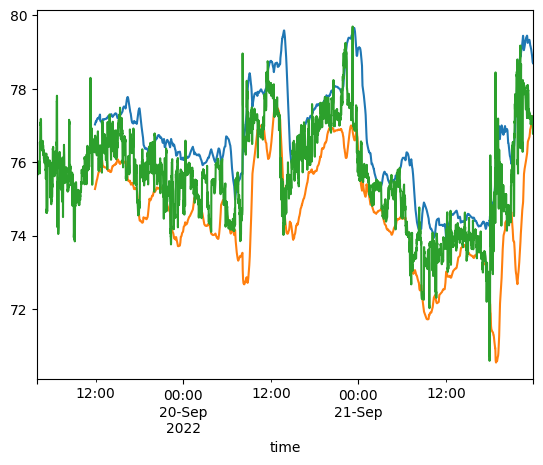

In [40]:
upper.plot()
lower.plot()
values.value.plot()

In [17]:
upper

time
2022-09-19 04:00:00          NaN
2022-09-19 04:01:00          NaN
2022-09-19 04:02:00          NaN
2022-09-19 04:03:00          NaN
2022-09-19 04:04:00          NaN
                         ...    
2022-09-21 23:55:00    77.879966
2022-09-21 23:56:00    77.836121
2022-09-21 23:57:00    77.764310
2022-09-21 23:58:00    77.683560
2022-09-21 23:59:00    77.592375
Freq: T, Length: 4080, dtype: float64

In [ ]:
def bband(values, window, stdevs):
    pass

In [29]:
def adjusted_std(values):
    vdiff = values[-1] - values[0]
    l = len(values)
    interpolated = [values[0] + 1.0 * i / l * vdiff for i in range(l)]
    adjusted = values - interpolated
    return np.std(adjusted)

In [44]:
math.exp(-1)

0.36787944117144233

In [86]:
def adjustment_factor(values):
    vdiff = (values[-1] - values[0]) / values[0]
    Diff = 0.5
    return (1 + math.exp(-vdiff / Diff))

In [87]:
math.exp(-10)

4.5399929762484854e-05

<Axes: xlabel='time'>

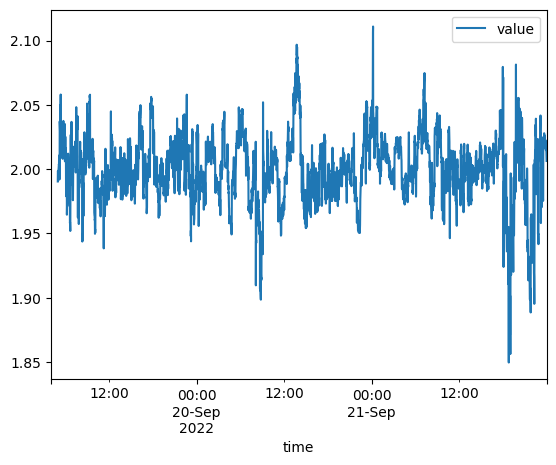

In [88]:
values.rolling(window).apply(adjustment_factor).plot()

In [91]:
def bband(values, window, stds):
    df_band = values.copy()
    df_band['upper'] = (values.ewm(alpha=0.1).mean() + stds * values.rolling(window).std()) # * values.rolling(window).apply(adjustment_factor))
    df_band['lower'] = (values.ewm(alpha=0.1).mean() - stds * values.rolling(window).std()) # / values.rolling(window).apply(adjustment_factor))
    return df_band   

In [92]:
df_band = bband(values, 60, 2)

In [98]:
df_band.head(65).tail(10)

,value,upper,lower
time,,,
2022-09-19 04:55:00,76.093417,NaN,NaN
2022-09-19 04:56:00,76.121386,NaN,NaN
2022-09-19 04:57:00,76.241054,NaN,NaN
2022-09-19 04:58:00,76.257885,NaN,NaN
2022-09-19 04:59:00,76.219600,77.054984,75.529017
2022-09-19 05:00:00,75.974250,77.019164,75.501183
2022-09-19 05:01:00,76.061775,76.995554,75.485056
2022-09-19 05:02:00,76.000160,76.971376,75.461142
2022-09-19 05:03:00,75.993303,76.943971,75.443904


<Axes: xlabel='time'>

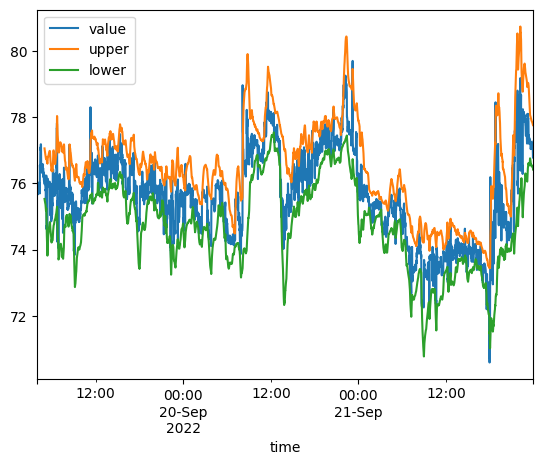

In [93]:
df_band.plot()

<Axes: xlabel='time'>

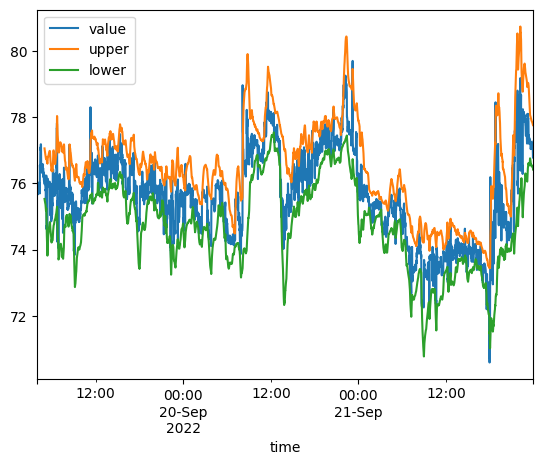

In [90]:
window = 60 
stds = 2
df_band = values.copy()
df_band['upper'] = (values.ewm(alpha=0.1).mean() + stds * values.rolling(window).std()) # * values.rolling(window).apply(adjustment_factor))
df_band['lower'] = (values.ewm(alpha=0.1).mean() - stds * values.rolling(window).std()) # / values.rolling(window).apply(adjustment_factor))
df_band.plot()

<Axes: xlabel='time'>

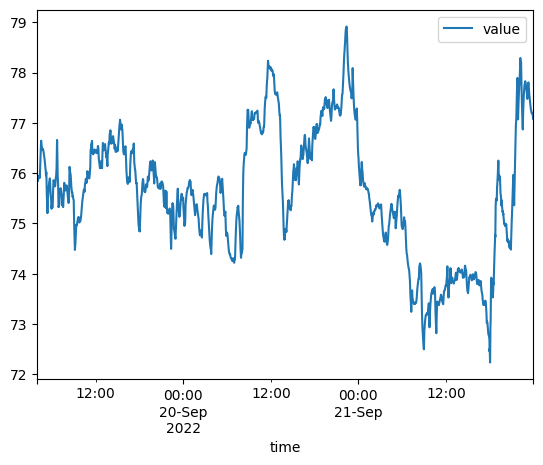

In [62]:
values.ewm(alpha=0.1).mean().plot()

In [30]:
values.rolling(window).apply(adjusted_std).tail()

,value
time,
2022-09-21 23:55:00,0.208664
2022-09-21 23:56:00,0.227584
2022-09-21 23:57:00,0.180641
2022-09-21 23:58:00,0.146793
2022-09-21 23:59:00,0.111065


<Axes: xlabel='time'>

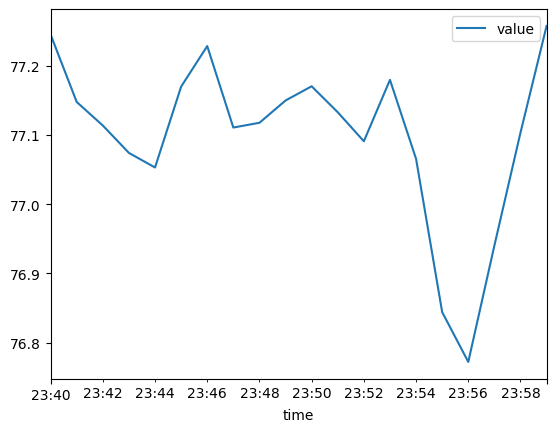

In [31]:
values.tail(20).plot()